não to a fim de escrever mas sinta-se à vontade se quiser explorar. Bem-vinda/o! kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk

In [ ]:
import pandas as pd
covid = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv')
covid = covid[covid['estado'] != 'TOTAL']
covid['data'] = pd.to_datetime(covid['data']).dt.date
covid.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

def grafico(dataset, x, y, titulo, subtitulo, labels, hue=None):
  p = sns.lineplot(x=dataset[x], 
                  y=dataset[y],
                   hue=hue)
  p.figure.set_size_inches(10, 5)
  p.set_title(titulo, loc='left', fontsize=18, pad=30)
  p.figure.text(x=0.125, y=0.91, s=subtitulo, fontsize=12)
  p.set_xlabel(labels[0], fontsize=14)
  p.set_ylabel(labels[1], fontsize=14)
  return p

def comparacao_timeseries(dados, coluna_analise, coluna_tempo, titulo, subtitulo, hue=None):
  dados[coluna_analise+'_aumento'] = dados[coluna_analise].diff()
  dados[coluna_analise+'_aceleração'] = dados[coluna_analise+'_aumento'].diff()

  ax = plt.subplot(3, 1, 1)
  ax = grafico(dados, coluna_tempo, coluna_analise, titulo, subtitulo, labels=['', coluna_analise], hue=hue)
  ax.figure.set_size_inches(15, 8)

  ax2 = plt.subplot(3, 1, 2)
  ax2 = grafico(dados, coluna_tempo, coluna_analise+'_aumento', '', '', labels=['', 'Aumento'], hue=hue)
  ax2.figure.set_size_inches(15, 8)

  ax3 = plt.subplot(3, 1, 3)
  ax3 = grafico(dados, coluna_tempo, coluna_analise+'_aceleração', '', '', labels=['Tempo', 'Aceleração'], hue=hue)
  ax3.figure.set_size_inches(15, 8)

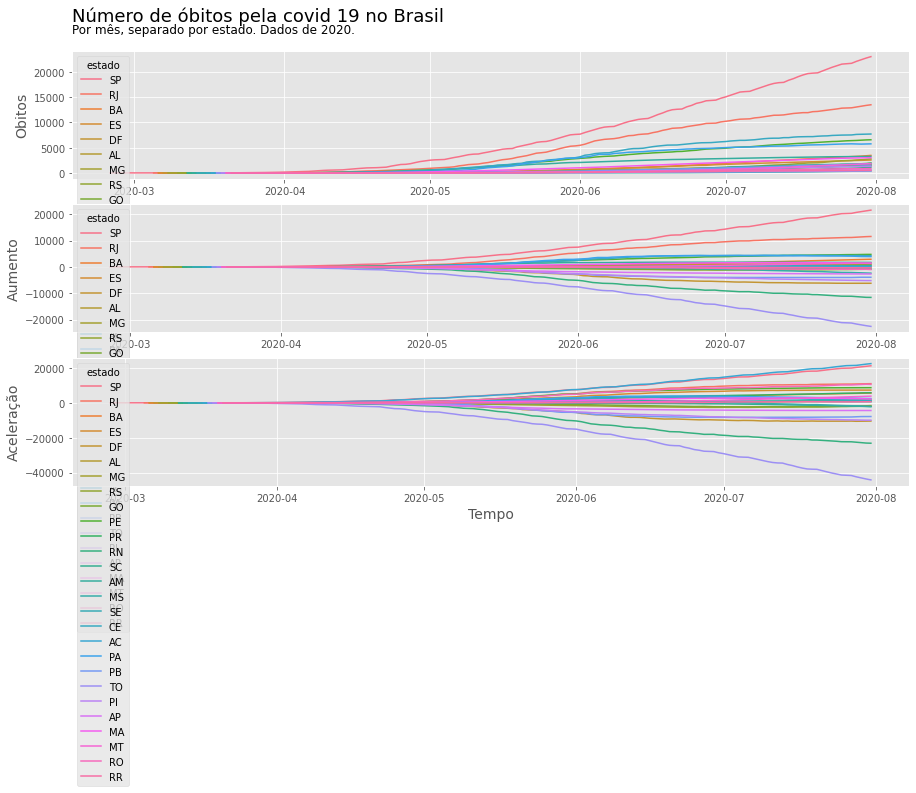

In [ ]:
comparacao_timeseries(covid, 'Obitos', 'data', 'Número de óbitos pela covid 19 no Brasil', 'Por mês, separado por estado. Dados de 2020.', hue=covid['estado'])

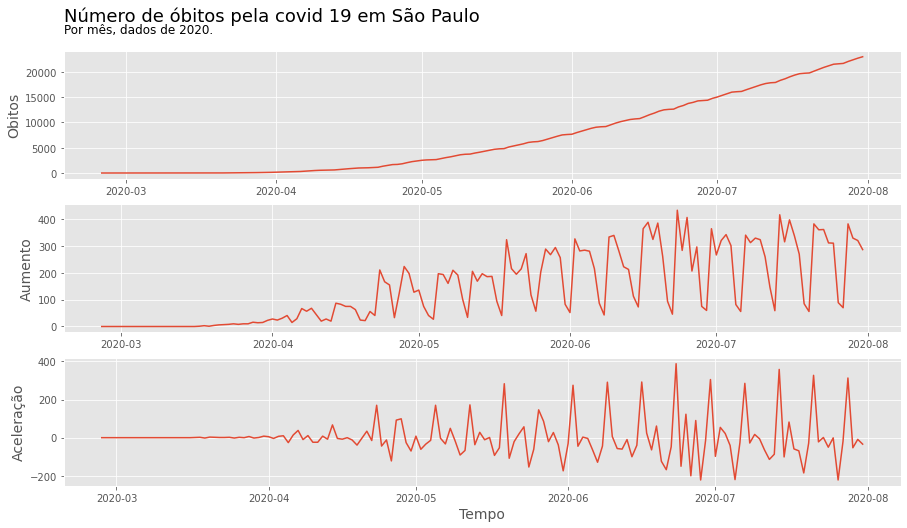

In [ ]:
covid_sp = covid[covid['estado'] == 'SP']
comparacao_timeseries(covid_sp, 
                      'Obitos', 'data', 
                      'Número de óbitos pela covid 19 em São Paulo', 
                      'Por mês, dados de 2020.')

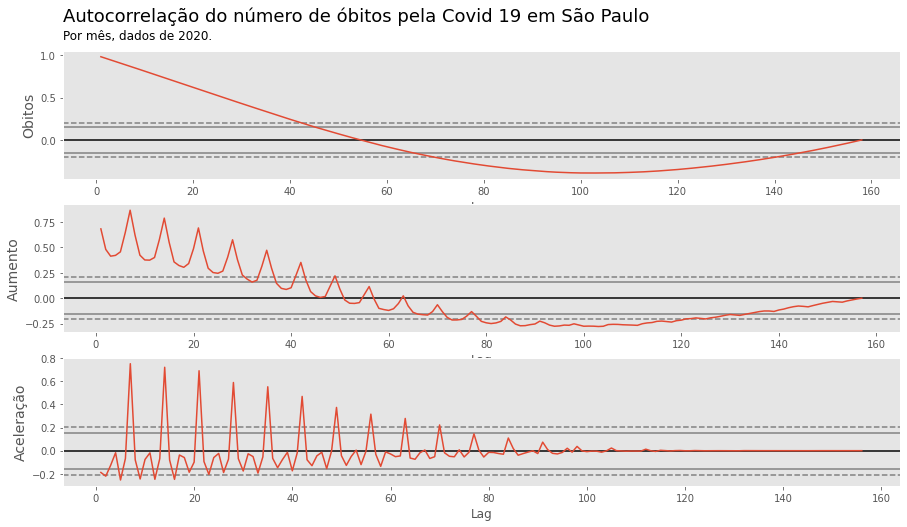

In [ ]:
def comparacao_autocorrelacao(dados, coluna_analise, titulo, subtitulo):
  dados[coluna_analise+'_aumento'] = dados[coluna_analise].diff()
  dados[coluna_analise+'_aceleração'] = dados[coluna_analise+'_aumento'].diff()

  plt.figure(figsize=(15, 8))

  ax = plt.subplot(3, 1, 1)
  a = pd.plotting.autocorrelation_plot(dados[coluna_analise], ax=ax)
  a.set_title(titulo, loc='left', fontsize=18, pad=30)
  a.figure.text(x=0.125, y=0.90, s=subtitulo, fontsize=12)
  a.set_ylabel(coluna_analise, fontsize=14)

  ax2 = plt.subplot(3, 1, 2)
  b = pd.plotting.autocorrelation_plot(dados[coluna_analise+'_aumento'][1:], ax=ax2)
  b.set_ylabel('Aumento', fontsize=14)

  ax3 = plt.subplot(3, 1, 3)
  c = pd.plotting.autocorrelation_plot(dados[coluna_analise+'_aceleração'][2:], ax=ax3)
  c.set_ylabel('Aceleração', fontsize=14)

comparacao_autocorrelacao(covid_sp, 'Obitos', 'Autocorrelação do número de óbitos pela Covid 19 em São Paulo', 'Por mês, dados de 2020.')

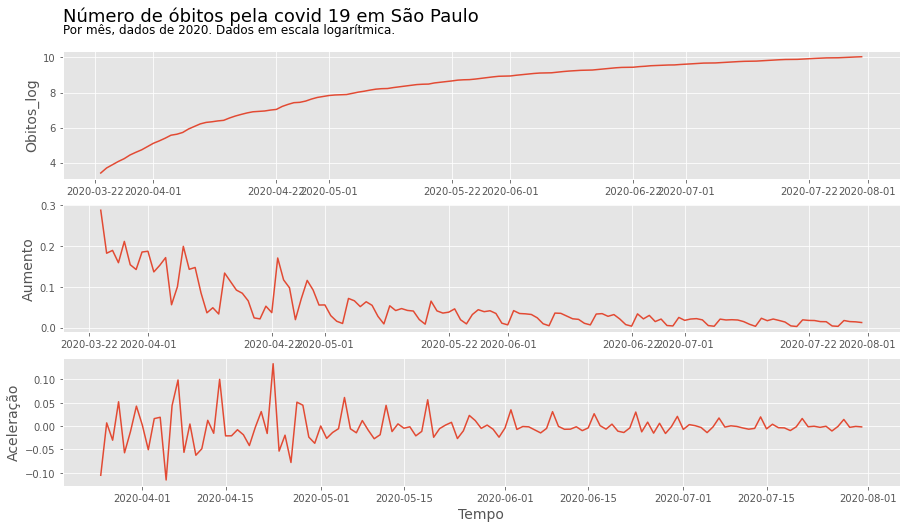

In [ ]:
import numpy as np
covid_sp['Obitos_log'] = covid_sp['Obitos'].apply(np.log)
comparacao_timeseries(covid_sp[covid_sp.data > pd.Timestamp('2020-03-22')], 
                      'Obitos_log', 'data', 
                      'Número de óbitos pela covid 19 em São Paulo', 
                      'Por mês, dados de 2020. Dados em escala logarítmica.')

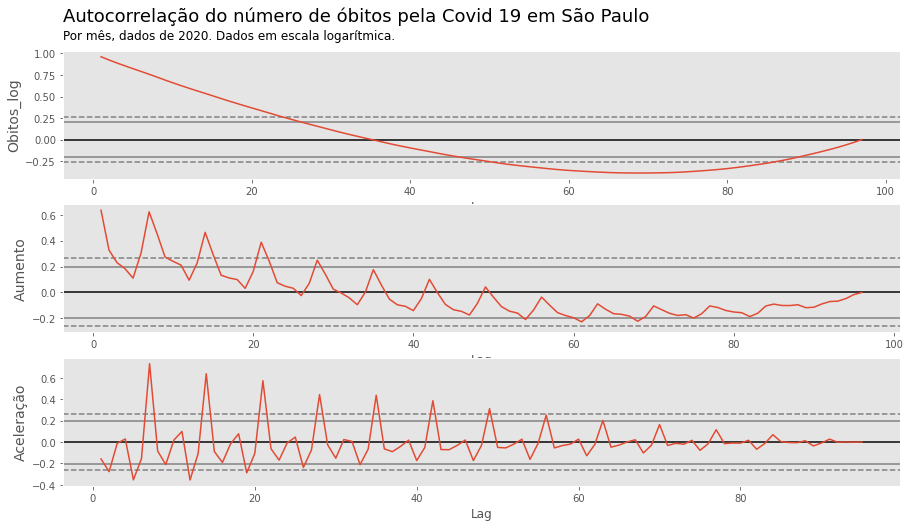

In [ ]:
comparacao_autocorrelacao(covid_sp.dropna()[covid.data > pd.Timestamp('2020-03-22')], 
                          'Obitos_log', 
                          'Autocorrelação do número de óbitos pela Covid 19 em São Paulo', 
                          'Por mês, dados de 2020. Dados em escala logarítmica.')

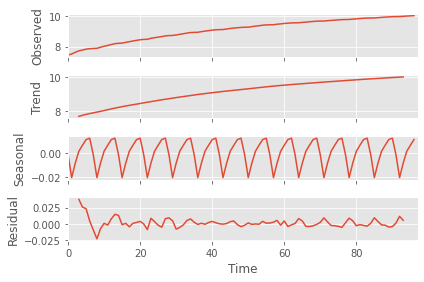

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose([covid_sp.dropna()['Obitos_log']], freq=7).plot()

In [ ]:
covid_sp['media_movel_obitos_7'] = covid_sp['Obitos_log'].rolling(7).mean()
covid_sp['media_movel_obitos_14'] = covid_sp['Obitos_log'].rolling(14).mean()

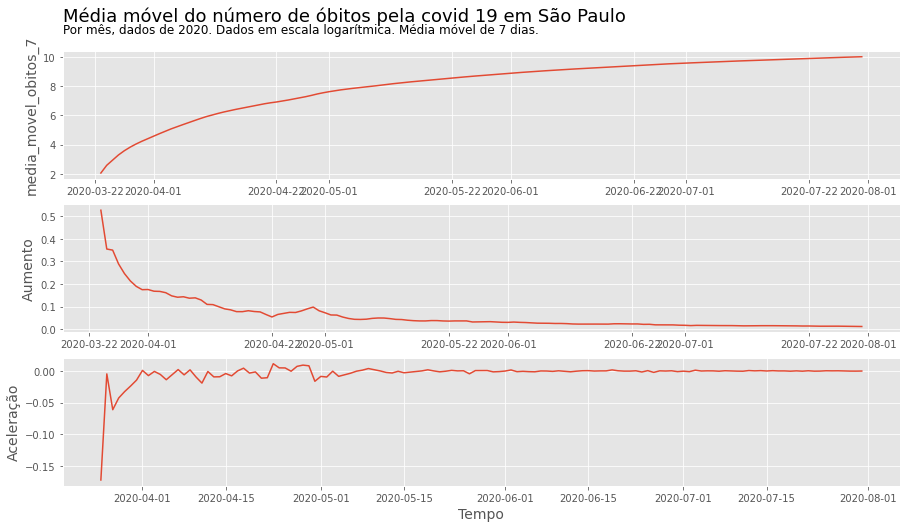

In [ ]:
comparacao_timeseries(covid_sp[covid_sp.data > pd.Timestamp('2020-03-22')], 
                      'media_movel_obitos_7', 'data', 
                      'Média móvel do número de óbitos pela covid 19 em São Paulo', 
                      'Por mês, dados de 2020. Dados em escala logarítmica. Média móvel de 7 dias.')

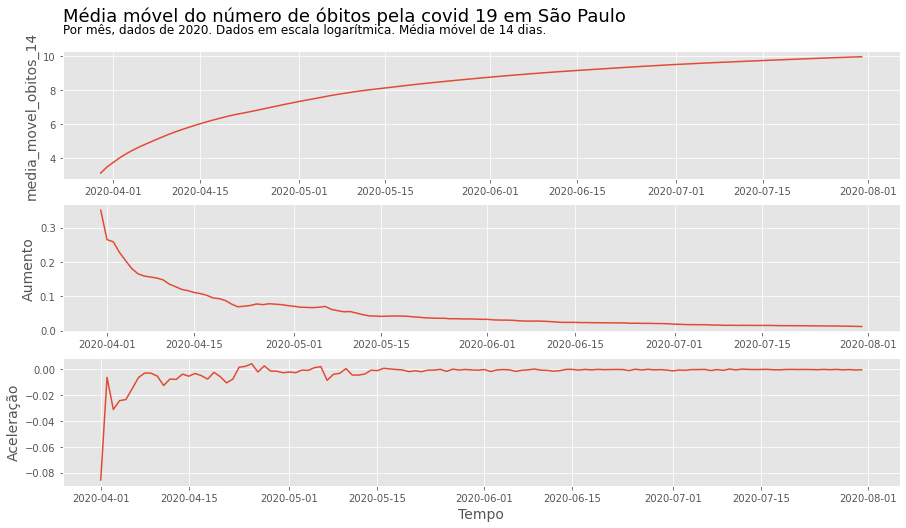

In [ ]:
comparacao_timeseries(covid_sp[covid_sp.data > pd.Timestamp('2020-03-22')], 
                      'media_movel_obitos_14', 'data', 
                      'Média móvel do número de óbitos pela covid 19 em São Paulo', 
                      'Por mês, dados de 2020. Dados em escala logarítmica. Média móvel de 14 dias.')

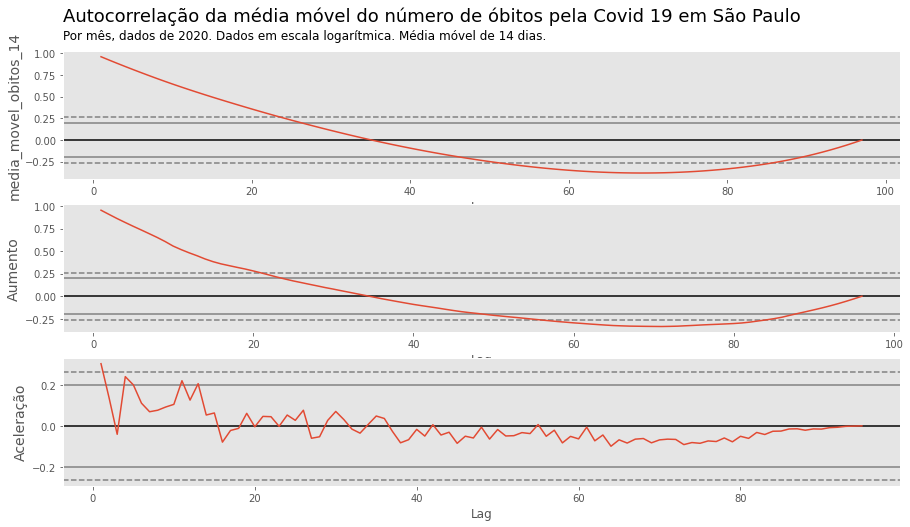

In [ ]:
comparacao_autocorrelacao(covid_sp.dropna()[covid.data > pd.Timestamp('2020-03-22')], 
                          'media_movel_obitos_14', 
                          'Autocorrelação da média móvel do número de óbitos pela Covid 19 em São Paulo', 
                          'Por mês, dados de 2020. Dados em escala logarítmica. Média móvel de 14 dias.')